# Plotting SVP data for RDD2024

Data collected by Swetha Vutlapalli - 2023

    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2023 D.Duke
    @license GPL-3.0+
    @version 0.0.1
    @date 05/05/2024

    Department of Mechanical & Aerospace Engineering
    Monash University, Australia

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
import scipy.optimize
%matplotlib ipympl

## Pure substance data

In [2]:
# This is from the NIST Chemistry WebBook, SRD 69 
# https://webbook.nist.gov/cgi/fluid.cgi?TLow=-45&THigh=55&TInc=1&Digits=5&ID=C811972&Action=Load&Type=SatP&TUnit=C&PUnit=bar&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF
HFA134a_NIST = {'EthanolFraction':0, 'descriptor':'HFA-134a Pure SVP',\
                'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]),\
                'Pressure_bar_abs':np.array([0.39117,0.41329,0.4364,0.46055,0.48577,0.51209,0.53954,0.56817,0.59801,0.62908,0.66144,0.69512,0.73015,0.76658,0.80444,0.84378,0.88463,0.92703,0.97103,1.0167,1.064,1.113,1.1639,1.2165,1.271,1.3273,1.3857,1.446,1.5084,1.5728,1.6394,1.7082,1.7792,1.8524,1.928,2.006,2.0864,2.1693,2.2548,2.3428,2.4334,2.5268,2.6228,2.7217,2.8234,2.928,3.0356,3.1462,3.2598,3.3766,3.4966,3.6198,3.7463,3.8761,4.0094,4.1461,4.2863,4.4301,4.5776,4.7288,4.8837,5.0425,5.2052,5.3718,5.5424,5.7171,5.8959,6.0789,6.2662,6.4578,6.6538,6.8543,7.0592,7.2688,7.483,7.702,7.9257,8.1543,8.3878,8.6262,8.8698,9.1185,9.3724,9.6315,9.896,10.166,10.441,10.722,11.009,11.301,11.599,11.903,12.213,12.529,12.851,13.179,13.513,13.854])}

# This is from the NIST Chemistry WebBook, SRD 69 
# https://webbook.nist.gov/cgi/fluid.cgi?TLow=-45&THigh=55&TInc=1&Digits=5&ID=C75376&Action=Load&Type=SatP&TUnit=C&PUnit=bar&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF
HFA152a_NIST = {'EthanolFraction':0, 'descriptor':'HFA-152a Pure SVP',\
    'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]),\
    'Pressure_bar_abs':np.array([0.36233,0.38244,0.40344,0.42537,0.44825,0.47211,0.49699,0.52291,0.54991,0.57802,0.60727,0.63769,0.66933,0.70221,0.73636,0.77183,0.80865,0.84685,0.88647,0.92755,0.97012,1.0142,1.0599,1.1072,1.1562,1.2068,1.2592,1.3133,1.3692,1.427,1.4868,1.5484,1.612,1.6777,1.7454,1.8152,1.8872,1.9614,2.0379,2.1166,2.1977,2.2812,2.3671,2.4555,2.5464,2.6399,2.736,2.8348,2.9364,3.0407,3.1478,3.2578,3.3708,3.4867,3.6056,3.7276,3.8528,3.9811,4.1127,4.2476,4.3858,4.5274,4.6725,4.8211,4.9733,5.129,5.2885,5.4516,5.6186,5.7894,5.9641,6.1428,6.3254,6.5122,6.7031,6.8982,7.0975,7.3011,7.5091,7.7216,7.9385,8.16,8.3861,8.6168,8.8523,9.0926,9.3378,9.5879,9.843,10.103,10.368,10.639,10.915,11.196,11.482,11.774,12.071,12.374])}

# This is from NIST REFPROP 10
HFO1234_NIST = {'EthanolFraction':0, 'descriptor':'HFO-1234ze(E) Pure SVP',\
    'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]),\
    'Pressure_bar_abs':np.array([0.27931,0.29541,0.31224,0.32985,0.34825,0.36747,0.38754,0.40848,0.43033,0.45311,0.47684,0.50157,0.52731,0.5541,0.58197,0.61094,0.64106,0.67234,0.70483,0.73855,0.77355,0.80984,0.84747,0.88647,0.92687,0.96872,1.012,1.0569,1.1032,1.1512,1.2008,1.252,1.305,1.3596,1.4161,1.4744,1.5345,1.5965,1.6604,1.7263,1.7942,1.8642,1.9363,2.0105,2.0869,2.1655,2.2464,2.3296,2.4151,2.5031,2.5934,2.6863,2.7817,2.8797,2.9803,3.0836,3.1896,3.2983,3.4099,3.5243,3.6416,3.7619,3.8851,4.0114,4.1409,4.2734,4.4092,4.5482,4.6905,4.8362,4.9852,5.1377,5.2937,5.4533,5.6164,5.7833,5.9538,6.1281,6.3062,6.4882,6.6741,6.864,7.0579,7.256,7.4581,7.6645,7.8751,8.0901,8.3094,8.5332,8.7615,8.9943,9.2317,9.4738,9.7206,9.9722,10.229,10.49,10.756,11.028,11.304])}

# From Antoine Equation

def ethanol_antoine(TdegC):
    A=8.20417; B=1642.89; C=230.3; # Coeffs from internet.
    mmHg= (10**(A-(B/(C+TdegC)))) # Antoine eqn.
    mmHg[(TdegC<-57) | (TdegC>80)] = np.nan
    return mmHg * 0.00133322 # convert mmHg to bar abs.

Ethanol_SVP = {'EthanolFraction':0, 'descriptor':'Pure Ethanol SVP',\
               'NIST_Temp_degC':np.array([-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])}
Ethanol_SVP['Pressure_bar_abs'] = ethanol_antoine(Ethanol_SVP['NIST_Temp_degC'])

## HFA-134a Results

In [3]:
# Where data are stored.
directory = "/Users/dduke/Library/CloudStorage/GoogleDrive-daniel.duke@monash.edu/My Drive/ExperimentData/2024_Swetha/SVP_pure_mixtures_Data/"
filename = "R134_Data_05032023.xlsx"

# From lab precision balance data spreadsheet.

# actual ethanol mass fractions after pressure-filling
canister_massFracEth_actual = {50:0.492982456, 60:0.596089082, 70:0.705479452,\
                               90:0.904309252, 80:0.808011724, 30:0.302002107, 20:0.200629116,\
                               15:0.149585777, 8:0.080316206, 40:0.431091422}
# Thermophysical constants.
mwt_propellant = 102.03 #[g/mol]
mwt_ethanol = 46.068 #[g/mol]
omega_p = 0.32684 # acentric factor of propellant [-]
pc_p = 4059280.0 # critical pressure of propellant [Pa]
Tc_p = 374.21 # critical point temperature of propellant [K]

# From NIST Webbook.
pureProp = HFA134a_NIST
purePropLiquidMolarVolume = lambda t: 2.2507E-09*t**2 - 1.0481E-06*t + 1.9679E-04 #R² = 9.9740E-01
ethanolLiquidMolarVolume = lambda t: 6.2775E-08*t + 3.9964E-05 #R² = 9.9982E-01

In [4]:
# Read data
data = {}
print("Reading %s" % filename)
for sheet_name in pd.ExcelFile(directory+filename).sheet_names:
    if sheet_name[0]=='E':
        eth_frac = int(sheet_name.split('_')[0].strip('E'))
        print("\timport "+sheet_name)
        df = pd.read_excel(directory+filename, sheet_name=sheet_name)
        temp = np.array(df['T_canisterNew'])
        pres = np.array(df['P (Abs)'])
        temp_err = np.sqrt(  np.array(df['T (Calib).1'])**2 + (0.1)**2 ) # geometric sum of expt err and sensor accuracy
        pres_err = np.sqrt(  np.array(df['P (Gauge).1'])**2 + ((8e-4+1e-3*pres)*pres)**2 )  # geometric sum of expt err and sensor accuracy
        data[eth_frac]=(temp,pres,temp_err,pres_err)

Reading R134_Data_05032023.xlsx
	import E8_abs
	import E15_abs
	import E20_abs
	import E30_abs
	import E40_abs
	import E50_gauge
	import E60_gauge
	import E70_gauge
	import E80_gauge
	import E90_abs


In [5]:
# Set a known vector of ethanol mass fraction. Rather than using the 'nominal' value, we take the 'actual' measured value from the weights.
ethww = np.array([canister_massFracEth_actual[e] for e in data.keys()])

# Compute mole fraction from mass fraction
moles = ethww/mwt_ethanol + (1-ethww)/mwt_propellant
ethx = ethww/mwt_ethanol/moles
print("Mass frac nominal =",list(data.keys()))
print("Mass fractions    =",np.round(ethww,4))
print("Mole fractions    =",np.round(ethx,4))
def mass_to_mole_fraction(m): return m/mwt_ethanol/((m/mwt_ethanol) + (1-m)/mwt_propellant)
def mole_to_mass_fraction(x): return x*mwt_ethanol/((x*mwt_ethanol) + (1-x)*mwt_propellant)

Mass frac nominal = [8, 15, 20, 30, 40, 50, 60, 70, 80, 90]
Mass fractions    = [0.0803 0.1496 0.2006 0.302  0.4311 0.493  0.5961 0.7055 0.808  0.9043]
Mole fractions    = [0.1621 0.2804 0.3573 0.4893 0.6266 0.6829 0.7657 0.8414 0.9031 0.9544]


In [6]:
# Interpolate onto isotherms.

# Set a known vector of temperatures. 
dT = 5
minval = -45 #np.nanmin([ np.nanmin(data[e][0]) for e in data.keys() ])
maxval = np.nanmax([ np.nanmax(data[e][0]) for e in data.keys() ])
all_temp = np.arange(np.round(minval,0), np.round(maxval,0), dT)
print("Interpolate to temps:",all_temp)

def normt(t_): return (t_-all_temp.min())/(all_temp.max()-all_temp.min())

# For each temperature, go through each nominal ethanol fraction and interpolate in temperature axis.
dataTempInterp={}
for new_temp in all_temp:
    interpolatedIsotherm = []
    for e in data.keys(): # will be same order everytime
        temp_src_data, pres_src_data, temp_err, pres_err = data[e] # get data
        f = (~np.isnan(pres_src_data))&(~np.isnan(temp_src_data)) # filter out NaN
        i = np.argsort(temp_src_data[f])
        cs = CubicSpline(temp_src_data[f][i], pres_src_data[f][i],extrapolate=False) # interpolate in temp axis
        interpolatedIsotherm.append(cs(new_temp)) # save result
    dataTempInterp[str(int(new_temp))] = np.array(interpolatedIsotherm) # save all eth fracs for new_temp

# Interpolate pure propellant vapor pressure curve onto the same temperatures as the experimentally interpolated isotherms
def interpolate_pure_propellant(pureProp, all_temp):
    pure_interp=[]
    for t in all_temp:
        cs = CubicSpline(pureProp['NIST_Temp_degC'],pureProp['Pressure_bar_abs'])
        pure_interp.append(cs(t))
    return np.array(pure_interp)

pureprop_interp = interpolate_pure_propellant(pureProp, all_temp)
pureEthanolVP=ethanol_antoine(all_temp)

Interpolate to temps: [-45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.  20.
  25.  30.  35.  40.  45.  50.]


In [7]:
# Plotting subroutines.

def cfun(x):
    return plt.colormaps['jet'](x)

def make_composite_pressure_plot(all_temp, ethww, ethx, dataTempInterp, pure_interp=None, pureEthanolVP=None, xlabel1='Ethanol mass fraction [w/w]', xlabel2='Ethanol mole fraction [-]',\
                                ylabel='Pressure (bar Abs)', exptInLegend=False, ls='-', dataError=None):

    # tick labelling for mass and mole fractions
    aa = np.copy(ethww); bb=np.copy(ethx);
    
        
    # Interpolated experiment data
    l='Experimental data'
    for t in dataTempInterp.keys():
        if exptInLegend: l='T=%+0.0fºC'%(float(t))
        if dataError is None:
            plt.plot(ethww,dataTempInterp[t], marker='o', label=l, ms=5, lw=1, ls=ls, c=cfun(normt(float(t))))
        else:
            plt.errorbar(ethww,dataTempInterp[t],yerr=dataError[t], marker='o', capsize=5, label=l, ms=5,\
                         lw=1, ls=ls, c=cfun(normt(float(t))))
        if l is not None: l=None

    if (ls is not None) and (ls != 'None'): ls = '-.'
    
    # Pure propellant
    if pure_interp is not None:
        a=np.hstack((0,aa)); b=np.hstack((0,bb))
        for t in dataTempInterp.keys():
            i = np.where(np.isclose(all_temp,float(t)))[0][0]
            plt.plot((0,ethww[0]),(pure_interp[i], dataTempInterp[t][0]), ls=ls, lw=1, c=cfun(normt(float(t)))) # linking line
        plt.scatter(np.zeros_like(pure_interp), pure_interp, marker='x',label='Pure Propellant',c=cfun(normt(all_temp)))
    
    
    # Pure ethanol 
    if pureEthanolVP is not None:
        a=np.hstack((b,1)); b=np.hstack((b,1))
        i=0
        for t in dataTempInterp.keys():
            plt.plot((ethww[-1],1),(dataTempInterp[t][-1], pureEthanolVP[i]), ls=ls, lw=1, c=cfun(normt(float(t)))) # linking line
            i+=1
        plt.scatter(np.ones_like(all_temp), pureEthanolVP,marker='+',label='Pure Cosolvent',c=cfun(normt(all_temp)))
        
    # Plot layout
    plt.grid();
    plt.ylabel(ylabel); plt.xlabel(xlabel1);
    plt.subplots_adjust(right=0.85); plt.xlim(-0.02,1.02)
    plt.legend();#fontsize=9);
    
    # Add mole fraction axis
    ax1 = plt.gca()
    ax2 = plt.gca().twiny()
    plt.xlim(-0.02,1.02)
    ax2.set_xlabel(xlabel2);
    ax2.set_xticks(aa,labels=["%.2f" % v for v in bb],rotation=45)
    
    # Colorbar
    cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    cb = mpl.colorbar.ColorbarBase(cax, cmap='jet',norm=mpl.colors.Normalize(all_temp.min(), all_temp.max()),ticks=all_temp)
    cb.set_label('Temperature [ºC]');

    return ax1

In [8]:
# net weights [g]
canister_eth_weights ={50:4.496, 40:5.352/1.3, 60: 5.487,  70:6.489, 80:6.616, 90:8.562, 30:2.866,\
                       20:2.041, 15:1.607, 8:1.016}
canister_prop_weights={50:9.120, 40:12.415/1.3,60: 9.205, 70:9.198, 80:8.188, 90:9.468, 30:9.490,\
                       20:10.173,15:10.743,8 :12.650}


massEthanol = np.array([canister_eth_weights[e] for e in data.keys()])
massPropellant = np.array([canister_prop_weights[e] for e in data.keys()])

mTot=massEthanol+massPropellant
mwt=mwt_propellant*(1-ethx) + mwt_ethanol*(ethx) # g/mol

def normalizeMolarContent(pressure,correct_for_air=True):
    presssureNormalized = {}
    for temp_C in pressure.keys():
        pres = pressure[temp_C];
        Vcan = 15e-6 #m^3
        Vhead = 30e-6 #m^3
        R = 8.31446261815324 # J/mol-K
        temp_fill=18.  # degC
        
        n_liq_eth = massEthanol/mwt_ethanol # moles
        n_liq_prop= massPropellant/mwt_propellant # moles
        V_liq_eth = ethanolLiquidMolarVolume(float(temp_C)) * n_liq_eth # m^3
        V_liq_prop = purePropLiquidMolarVolume(float(temp_C)) * n_liq_prop # m^3
        n_air = 101325*(Vcan+Vhead-V_liq_eth)/(R*(temp_fill+273.15)) # moles
        n_air[n_air<0]=0
        if not correct_for_air: n_air*=0
        V_air_atPressure = n_air*(R*(float(temp_C)+273.15))/(1e5) # m^3
        V_air_atPressure[V_air_atPressure<0]=0
        n_vap = pres*1e5*(Vhead+Vcan-V_liq_eth-V_liq_prop-V_air_atPressure)/(R*(float(temp_C)+273.15)) # moles
        n_vap[n_vap<0]=0
        totalMoles = (n_liq_eth + n_liq_prop + n_vap )
        norm = np.nanmean(totalMoles[1]) / totalMoles
        norm[np.isnan(norm)]=1.
        presssureNormalized[temp_C] = pres * norm
    return presssureNormalized

In [9]:
# Peng-Robinson EoS

PR_coeffs = np.array([[ 5.92065370e-10, -3.58226362e-07, -3.72400196e-05,  7.80475589e-11],\
                       [ 1.32904166e-08, -3.50446403e-06,  4.50555998e-04, -2.02635812e-10]])

x_ = np.linspace(0,1,50)

def pr_fit(t_):

    # Matrix of temp(ºC) and mole fraction
    tt, xx = np.meshgrid(t_,x_)
    
    # Calculate matrix of Vm
    m = PR_coeffs[0,0]*t_**2 + PR_coeffs[0,1]*t_ + PR_coeffs[0,2] + PR_coeffs[0,3]*t_**3
    n = PR_coeffs[1,0]*t_**2 + PR_coeffs[1,1]*t_ + PR_coeffs[1,2] + PR_coeffs[1,3]*t_**3
    Vm_ = m*xx + n
    
    # Peng-Robinson EoS
    R = 8.31446261815324 # J/mol-K
    Omega_A = 0.45724
    Omega_B = 0.07780
    a = Omega_A*(R**2)*(Tc_p**2)/pc_p
    b = Omega_B*R*Tc_p/pc_p
    kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson
    TK_ = tt+273.15 # ºC to Kelvin
    Tr = TK_/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    
    p0 = (R*TK_)/(Vm_ - b)
    p1 = a*alpha/(Vm_**2 + 2*b*Vm_ - b**2)
    p_ = (p0-p1)/1e5

    return p_

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/2693654755.py:35: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


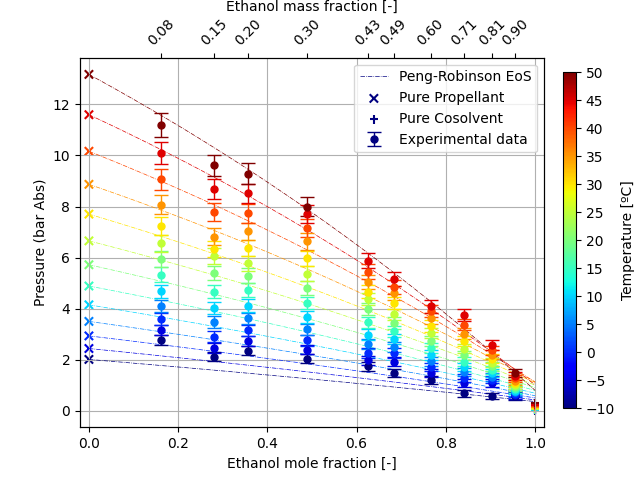

In [10]:
# Make production ready figure.

fig=plt.figure()
ax=fig.add_subplot(111)

n=7 # starting temperature index.

pressureData = normalizeMolarContent(dataTempInterp)
def normt(t_): return (t_-all_temp[n:].min())/(all_temp[n:].max()-all_temp[n:].min())
pressureDataLimited = { str(t): pressureData[str(t)] for t in all_temp[n:].astype(int) }

eps = { t: pressureDataLimited[t]*3.259840732/100. + 13.78*0.008 for t in pressureDataLimited.keys() }

lab='Peng-Robinson EoS'
for i in range(len(all_temp[n:])):
    pr_p = pr_fit(all_temp[n:])
    sc = pureprop_interp[n+i]/pr_p[0,i]
    plt.plot(x_,sc*pr_p[:,i],c=cfun(normt(all_temp[n+i])),lw=.5,ls='-.',label=lab);
    lab=None


make_composite_pressure_plot(all_temp[n:], ethx, ethww, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None', dataError=eps);

plt.savefig("R134a_PR.pdf");
keepData = {'134a':(all_temp[n:], ethx, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:], eps, ethww)}


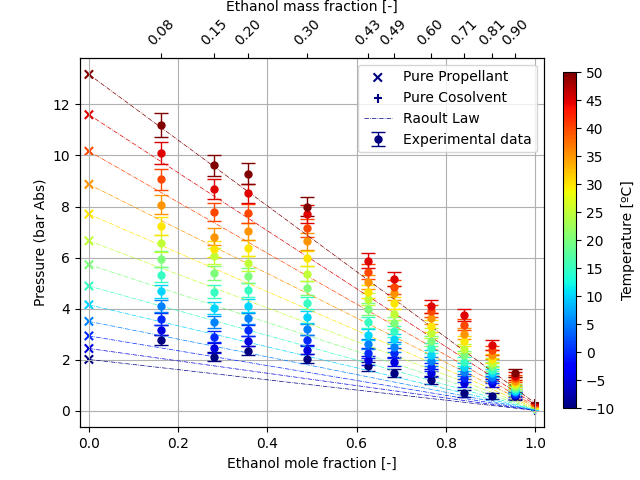

In [11]:
# For comparison, show the Raoult Law line

fig=plt.figure()
ax=fig.add_subplot(111)


make_composite_pressure_plot(all_temp[n:], ethx, ethww, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None',dataError=eps);


l='Raoult Law'
for p1,t in zip(pureprop_interp[n:],all_temp[n:]):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls='-.',c=cfun(normt(t)),label=l,lw=.5)
    if l is not None: l=None
ax.legend();
plt.savefig("R134a_RL.pdf");

## HFA-152a Results

In [12]:
# Where data are stored.
filename = "R152a_Data_05032023.xlsx"

# From lab precision balance data spreadsheet.

# actual ethanol mass fractions after pressure-filling
canister_massFracEth_actual = {8:0.079902676, 15:0.141608585, 20:0.20204828, 30:0.297843577,\
                              40:0.400860217, 50:0.473121124, 60:0.5894246, 70:0.70017369,\
                              80: 0.783541307, 90:0.878169969} # redundant cans for 50&15

# Thermophysical constants.
mwt_propellant = 66.05 #[g/mol]
omega_p = 0.275217114532099 # acentric factor of propellant [-]
pc_p =  4520000.0 # critical pressure of propellant [Pa]
Tc_p = 386.411 # critical point temperature of propellant [K]

# From NIST Webbook.
pureProp = HFA152a_NIST
purePropLiquidMolarVolume = lambda t: 1.4149E-09*t**2 - 6.2093E-07*t + 1.3270E-04 #R² = 9.9876E-01

In [13]:
# Read data
data = {}
print("Reading %s" % filename)
for sheet_name in pd.ExcelFile(directory+filename).sheet_names:
    if sheet_name[0]=='E':
        eth_frac = int(sheet_name.split('_')[0].strip('E'))
        print("\timport "+sheet_name)
        df = pd.read_excel(directory+filename, sheet_name=sheet_name)
        temp = np.array(df['T_canisterNew'])
        pres = np.array(df['P (Abs)'])
        temp_err = None#np.sqrt(  np.array(df['T (Calib).1'])**2 + (0.1)**2 ) # geometric sum of expt err and sensor accuracy
        pres_err = None#np.sqrt(  np.array(df['P (Gauge).1'])**2 + ((8e-4+1e-3*pres)*pres)**2 )  # geometric sum of expt err and sensor accuracy
        data[eth_frac]=(temp,pres,temp_err,pres_err)

Reading R152a_Data_05032023.xlsx
	import E8_abs
	import E15_abs
	import E20_abs
	import E30_gauge
	import E40_abs
	import E50_abs
	import E60_gauge
	import E70_gauge
	import E80_gauge
	import E90_abs


In [14]:
# Set a known vector of ethanol mass fraction. Rather than using the 'nominal' value, we take the 'actual' measured value from the weights.
ethww = np.array([canister_massFracEth_actual[e] for e in data.keys()])

# Compute mole fraction from mass fraction
moles = ethww/mwt_ethanol + (1-ethww)/mwt_propellant
ethx = ethww/mwt_ethanol/moles
print("Mass frac nominal =",list(data.keys()))
print("Mass fractions    =",np.round(ethww,4))
print("Mole fractions    =",np.round(ethx,4))
def mass_to_mole_fraction(m): return m/mwt_ethanol/((m/mwt_ethanol) + (1-m)/mwt_propellant)
def mole_to_mass_fraction(x): return x*mwt_ethanol/((x*mwt_ethanol) + (1-x)*mwt_propellant)

Mass frac nominal = [8, 15, 20, 30, 40, 50, 60, 70, 80, 90]
Mass fractions    = [0.0799 0.1416 0.202  0.2978 0.4009 0.4731 0.5894 0.7002 0.7835 0.8782]
Mole fractions    = [0.1107 0.1913 0.2663 0.3782 0.4896 0.5628 0.673  0.77   0.8384 0.9118]


In [15]:
# Interpolate onto isotherms.

# Set a known vector of temperatures. 
dT = 5
minval = -45 #np.nanmin([ np.nanmin(data[e][0]) for e in data.keys() ])
maxval = np.nanmax([ np.nanmax(data[e][0]) for e in data.keys() ])
all_temp = np.arange(np.round(minval,0), np.round(maxval,0), dT)
print("Interpolate to temps:",all_temp)

def normt(t_): return (t_-all_temp.min())/(all_temp.max()-all_temp.min())

# For each temperature, go through each nominal ethanol fraction and interpolate in temperature axis.
dataTempInterp={}
for new_temp in all_temp:
    interpolatedIsotherm = []
    for e in data.keys(): # will be same order everytime
        temp_src_data, pres_src_data, temp_err, pres_err = data[e] # get data
        f = (~np.isnan(pres_src_data))&(~np.isnan(temp_src_data)) # filter out NaN
        i = np.argsort(temp_src_data[f])
        cs = CubicSpline(temp_src_data[f][i], pres_src_data[f][i],extrapolate=False) # interpolate in temp axis
        interpolatedIsotherm.append(cs(new_temp)) # save result
    dataTempInterp[str(int(new_temp))] = np.array(interpolatedIsotherm) # save all eth fracs for new_temp

# Interpolate pure propellant vapor pressure curve onto the same temperatures as the experimentally interpolated isotherms
def interpolate_pure_propellant(pureProp, all_temp):
    pure_interp=[]
    for t in all_temp:
        cs = CubicSpline(pureProp['NIST_Temp_degC'],pureProp['Pressure_bar_abs'])
        pure_interp.append(cs(t))
    return np.array(pure_interp)

pureprop_interp = interpolate_pure_propellant(pureProp, all_temp)
pureEthanolVP=ethanol_antoine(all_temp)

Interpolate to temps: [-45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.  20.
  25.  30.  35.  40.  45.  50.]


In [16]:
# net weights [g]
canister_eth_weights ={8: 1.034, 15: 1.630, 20:2.234, 30:3.307,  40:3.928*1.1, 50:4.886, \
                      60:6.209/1.1, 70:6.680, 80:7.411, 90:8.183}  # redundant cans for 50&15
canister_prop_weights={8: 12.938, 15: 10.852, 20:11.055, 30:11.103, 40: 9.800*1.1, 50:10.636,\
                      60:10.534/1.1, 70:9.540, 80:9.459, 90:9.318}


massEthanol = np.array([canister_eth_weights[e] for e in data.keys()])
massPropellant = np.array([canister_prop_weights[e] for e in data.keys()])

mTot=massEthanol+massPropellant
mwt=mwt_propellant*(1-ethx) + mwt_ethanol*(ethx) # g/mol

def normalizeMolarContent(pressure,correct_for_air=True):
    presssureNormalized = {}
    for temp_C in pressure.keys():
        pres = pressure[temp_C];
        Vcan = 15e-6 #m^3
        Vhead = 30e-6 #m^3
        R = 8.31446261815324 # J/mol-K
        temp_fill=18.  # degC
        
        n_liq_eth = massEthanol/mwt_ethanol # moles
        n_liq_prop= massPropellant/mwt_propellant # moles
        V_liq_eth = ethanolLiquidMolarVolume(float(temp_C)) * n_liq_eth # m^3
        V_liq_prop = purePropLiquidMolarVolume(float(temp_C)) * n_liq_prop # m^3
        n_air = 101325*(Vcan+Vhead-V_liq_eth)/(R*(temp_fill+273.15)) # moles
        n_air[n_air<0]=0
        if not correct_for_air: n_air*=0
        V_air_atPressure = n_air*(R*(float(temp_C)+273.15))/(1e5) # m^3
        V_air_atPressure[V_air_atPressure<0]=0
        n_vap = pres*1e5*(Vhead+Vcan-V_liq_eth-V_liq_prop-V_air_atPressure)/(R*(float(temp_C)+273.15)) # moles
        n_vap[n_vap<0]=0
        totalMoles = (n_liq_eth + n_liq_prop + n_vap )
        norm = np.nanmean(totalMoles[1]) / totalMoles
        norm[np.isnan(norm)]=1.
        presssureNormalized[temp_C] = pres * norm
    return presssureNormalized

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1708500797.py:35: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


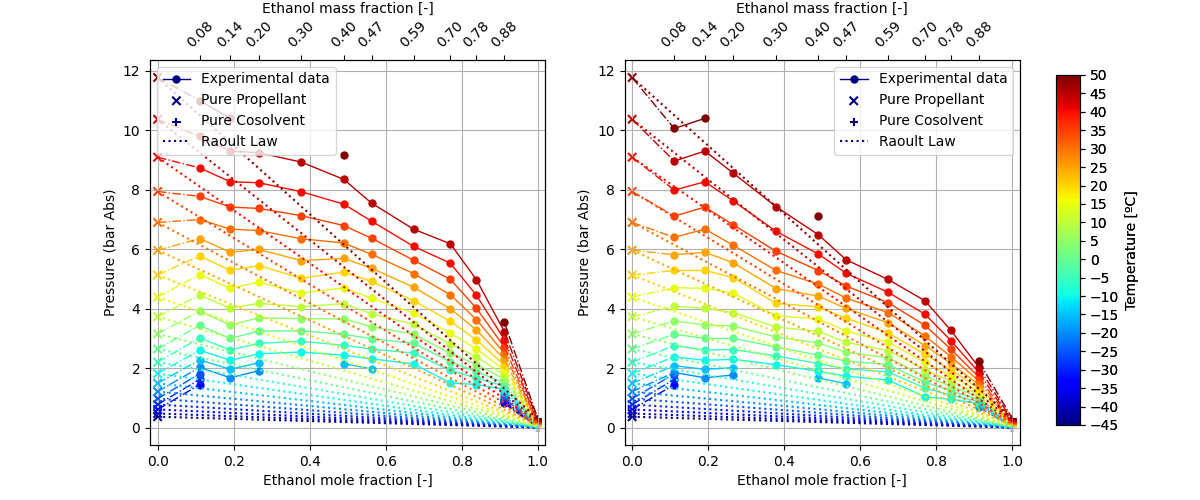

In [17]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
plt.title("RAW PRESSURE DATA")
make_composite_pressure_plot(all_temp, ethx, ethww, dataTempInterp, pureprop_interp, pureEthanolVP,\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

l='Raoult Law'
for p1,t in zip(pureprop_interp,all_temp):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls=':',c=cfun(normt(t)),label=l)
    if l is not None: l=None
ax.legend(loc=2);
#ax.plot(ethx,mTot,marker='s',c='k',label='Canister net weight [g]')
#ax.set_ylim(0,20)

ax=fig.add_subplot(122)
plt.title("CORRECTED PRESSURE DATA")

make_composite_pressure_plot(all_temp, ethx, ethww, normalizeMolarContent(dataTempInterp), pureprop_interp, pureEthanolVP,\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

l='Raoult Law'
for p1,t in zip(pureprop_interp,all_temp):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls=':',c=cfun(normt(t)),label=l)
    if l is not None: l=None
ax.legend();

In [18]:
# Scalar constants
R = 8.31446261815324 # J/mol-K
Omega_A = 0.45724
Omega_B = 0.07780
a = Omega_A*(R**2)*(Tc_p**2)/pc_p
b = Omega_B*R*Tc_p/pc_p
kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson
mwt=mwt_propellant*(1-ethx) + mwt_ethanol*(ethx) # g/mol
normalisedPressure=normalizeMolarContent(dataTempInterp)

PRZ={}; Vm={}
for t in dataTempInterp.keys():  # Loop through temperatures
    pressure = normalisedPressure[t]*1e5 # bar abs. to Pa
    TK = float(t)+273.15 # ºC to Kelvin
    Tr = TK/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    A = alpha*a*pressure/(R**2 * TK**2)  # PR coeff
    B = b*pressure/(R*TK)                # PR coeff

    # Cubic polynomial for Z is : Z^3 - (1-B)Z^2 + (A-2B-3B^2)Z - (AB-B^2-B^3) = 0
    coeffs = np.nan_to_num( np.vstack((np.ones_like(A), -(1-B), A-(2*B)-((3*B)**2), -(A*B - (B**2) - (B**3)))) )
    
    Z = np.array([ np.roots(coeffs[:,i]) for i in range(len(A)) ]) # solve
    Z[Z==0]=np.nan # mask
    PRZ[t] = Z# save

    # P.Vm = ZRT; Vm=ZRT/P
    Vm[t]=np.ones_like(Z)
    for i in range(3): Vm[t][:,i]*=(R*TK/pressure)*Z[:,i] #m^3/mol

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1708500797.py:35: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/4275443006.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = scipy.optimize.curve_fit(fun, np.array(x)[flt],\


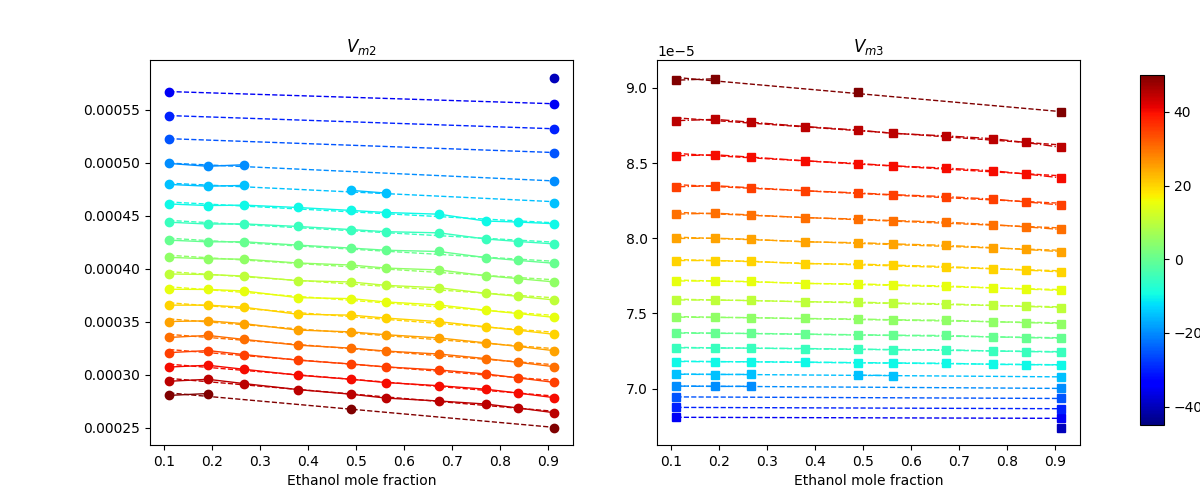

In [19]:
ffit  = lambda x,a,b : a*x+b

def r2_nonlin(original_data, fitted):
    ss_err = np.sum((original_data-fitted)**2)
    ss_tot = np.sum(original_data**2)
    return 1-np.sqrt(ss_err/ss_tot)

def do_fit(x, molarVolume, fun=ffit, p0=(1,0)):
    flt = ~np.isnan(molarVolume)
    if np.sum(flt)<2: return (np.nan, np.nan), 0
    popt, pcov = scipy.optimize.curve_fit(fun, np.array(x)[flt],\
                                          np.array(molarVolume)[flt], p0=p0)
    return popt, r2_nonlin(np.array(molarVolume), fun(np.array(x), *popt))
    
fig=plt.figure(figsize=(12,5))

ax2=fig.add_subplot(121)
plt.xlabel('Ethanol mole fraction')
plt.title(r'$V_{m2}$')

ax3=fig.add_subplot(122)
plt.xlabel('Ethanol mole fraction')
plt.title(r'$V_{m3}$')

fit_params = []

for t in dataTempInterp.keys():
    c = cfun(normt(float(t)))
    
    ax2.plot( ethx, Vm[t][:,1], c=c , marker='o', lw=1, ls='-')
    ax3.plot( ethx, Vm[t][:,2], c=c , marker='s', lw=1, ls='-.')

    popt1, r2 = do_fit(ethx, Vm[t][:,0])
    #ax.plot( ethx, ffit(ethx, *popt1), ls='--', c=c, lw=1)
    
    popt2, r2 = do_fit(ethx, Vm[t][:,1])
    ax2.plot( ethx, ffit(ethx, *popt2), ls='--', c=c, lw=1)

    popt3, r2 = do_fit(ethx, Vm[t][:,2])
    ax3.plot( ethx, ffit(ethx, *popt3), ls='--', c=c, lw=1)
    
    fit_params.append((popt1,popt2,popt3))
    
#plt.subplots_adjust(right=.94)
fit_params = np.array(fit_params)

# Colorbar
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, cmap='jet',norm=mpl.colors.Normalize(all_temp.min(),all_temp.max()))#,ticks=ethx)
cb.set_label('Temperature');

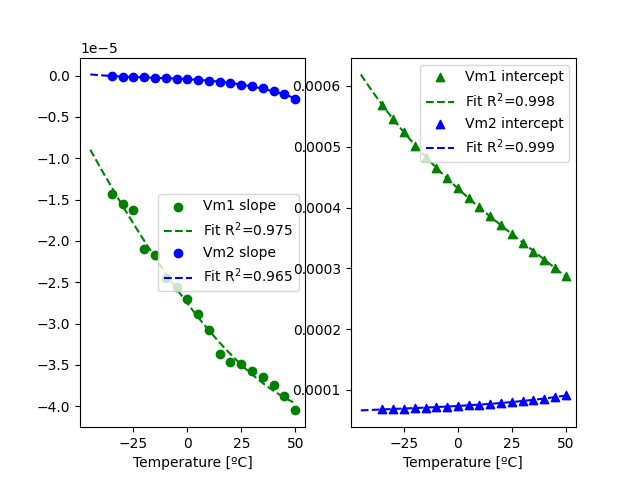

In [20]:
ffit2  = lambda x,a,b,c,d : d*x**3 + a*x**2+ b*x +c

fig=plt.figure()
cList=('r','g','b','c','m','y','k')
ax1=fig.add_subplot(121)
plt.xlabel('Temperature [ºC]')
ax2=fig.add_subplot(122)
plt.xlabel('Temperature [ºC]')
t_C = np.linspace(all_temp.min(), all_temp.max(), 50)

fit_params2=[]

for i in (1,2):
    # get non-NaN entries
    flt = ~np.isnan(fit_params[:,i,0])

    # Fit and plot slope
    ax1.scatter(all_temp,fit_params[:,i,0],marker='o',c=cList[i],label='Vm%i slope' % i)
    popt_slope,pcov = scipy.optimize.curve_fit(ffit2, all_temp[flt],fit_params[flt,i,0])
    r2 = r2_nonlin(fit_params[flt,i,0], ffit2(all_temp[flt],*popt_slope))
    ax1.plot(t_C, ffit2(t_C,*popt_slope), ls='--', c=cList[i],label=r'Fit R$^2$=%.3f' % r2)

    # Fit and plot intercept
    ax2.scatter(all_temp,fit_params[:,i,1],marker='^',c=cList[i],label='Vm%i intercept' % i);
    popt_inter,pcov = scipy.optimize.curve_fit(ffit2, all_temp[flt],fit_params[flt,i,1])
    r2 = r2_nonlin(fit_params[flt,i,1], ffit2(all_temp[flt],*popt_inter))
    ax2.plot(t_C, ffit2(t_C,*popt_inter), ls='--', c=cList[i],label=r'Fit R$^2$=%.3f' % r2)

    fit_params2.append((popt_slope,popt_inter))
    
ax1.legend();
ax2.legend();
fit_params2=np.array(fit_params2);

In [21]:
# Peng-Robinson EoS

PR_coeffs = fit_params2[0,...]

x_ = np.linspace(0,1,50)

def pr_fit(t_):

    # Matrix of temp(ºC) and mole fraction
    tt, xx = np.meshgrid(t_,x_)
    
    # Calculate matrix of Vm
    m = PR_coeffs[0,0]*t_**2 + PR_coeffs[0,1]*t_ + PR_coeffs[0,2] + PR_coeffs[0,3]*t_**3
    n = PR_coeffs[1,0]*t_**2 + PR_coeffs[1,1]*t_ + PR_coeffs[1,2] + PR_coeffs[1,3]*t_**3
    Vm_ = (m*xx + n)
    
    # Peng-Robinson EoS
    R = 8.31446261815324 # J/mol-K
    Omega_A = 0.45724
    Omega_B = 0.07780
    a = Omega_A*(R**2)*(Tc_p**2)/pc_p
    b = Omega_B*R*Tc_p/pc_p
    kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson
    TK_ = tt+273.15 # ºC to Kelvin
    Tr = TK_/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    
    p0 = (R*TK_)/(Vm_ - b)
    p1 = a*alpha/(Vm_**2 + 2*b*Vm_ - b**2)
    p_ = (p0-p1)/1e5

    return p_

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1708500797.py:35: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


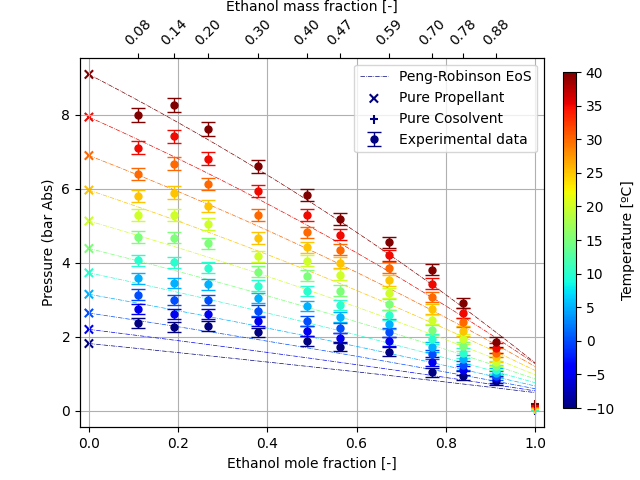

In [22]:
# Make production ready figure.

fig=plt.figure()
ax=fig.add_subplot(111)

n=7 # starting temperature index.
m=-2 # ending temperature index

pressureData = normalizeMolarContent(dataTempInterp)
def normt(t_): return (t_-all_temp[n:m].min())/(all_temp[n:m].max()-all_temp[n:m].min())
pressureDataLimited = { str(t): pressureData[str(t)] for t in all_temp[n:m].astype(int) }

eps = { t: pressureDataLimited[t]*0.96/100. + 13.78*0.008 for t in pressureDataLimited.keys() }

lab='Peng-Robinson EoS'
for i in range(len(all_temp[n:m])):
    pr_p = pr_fit(all_temp[n:m])
    sc = pureprop_interp[n+i]/pr_p[0,i]
    plt.plot(x_,sc*pr_p[:,i],c=cfun(normt(all_temp[n+i])),lw=.5,ls='-.',label=lab);
    lab=None


make_composite_pressure_plot(all_temp[n:m], ethx, ethww, pressureDataLimited, pureprop_interp[n:m], pureEthanolVP[n:m],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None', dataError=eps);

plt.savefig("R152a_PR.pdf");
keepData['152a']=(all_temp[n:], ethx, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:], eps, ethww)

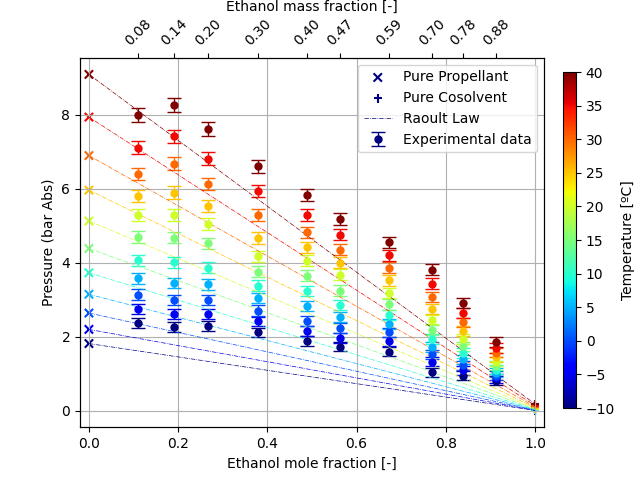

In [23]:
# For comparison, show the Raoult Law line

fig=plt.figure()
ax=fig.add_subplot(111)


make_composite_pressure_plot(all_temp[n:m], ethx, ethww, pressureDataLimited, pureprop_interp[n:m], pureEthanolVP[n:m],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None',dataError=eps);


l='Raoult Law'
for p1,t in zip(pureprop_interp[n:m],all_temp[n:m]):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls='-.',c=cfun(normt(t)),label=l,lw=.5)
    if l is not None: l=None
ax.legend();
plt.savefig("R152a_RL.pdf");

## HFO-1234ze(E) Data

In [24]:
# Where data are stored.
filename = "R1234_data_05032023.xlsx"

# From lab precision balance data spreadsheet.

# actual ethanol mass fractions after pressure-filling
canister_massFracEth_actual = {15:0.14914571, 8:0.080206442, 20:0.199851781, 30:0.298424917, 40:0.403368188, 50:0.502818993, 60:0.569244609,\
                              70:0.691219608, 80:0.786669499, 90:0.891293354} # redundant cans for 50&15

# Thermophysical constants.
mwt_propellant = 114.0416 #[g/mol]
omega_p = 0.3131440067624862 # acentric factor of propellant [-]
pc_p =  3634936.851021726 # critical pressure of propellant [Pa]
Tc_p = 382.52 # critical point temperature of propellant [K]

# From NIST Webbook.
pureProp = HFO1234_NIST
def purePropLiquidMolarVolume(t):
    theta_ = 1-(t/Tc_p)
    N1=1.1913; N2=2.2456; N3=-1.7747; N4=1.3096
    liquidDensity = (1+N1*theta_**0.27 + N2*theta_**0.7 + N2*theta_**1.25 + N2*theta_**1.9)*489.238
    return mwt_propellant*1e-3/liquidDensity

In [25]:
# Read data
data = {}
print("Reading %s" % filename)
for sheet_name in pd.ExcelFile(directory+filename).sheet_names:
    if sheet_name[0]=='E':
        eth_frac = int(sheet_name.split('_')[0].strip('E'))
        print("\timport "+sheet_name)
        df = pd.read_excel(directory+filename, sheet_name=sheet_name)
        temp = np.array(df['T_canisterNew'])
        pres = np.array(df['P (Abs)'])
        temp_err = None#np.sqrt(  np.array(df['T (Calib).1'])**2 + (0.1)**2 ) # geometric sum of expt err and sensor accuracy
        pres_err = None#np.sqrt(  np.array(df['P (Gauge).1'])**2 + ((8e-4+1e-3*pres)*pres)**2 )  # geometric sum of expt err and sensor accuracy
        data[eth_frac]=(temp,pres,temp_err,pres_err)

Reading R1234_data_05032023.xlsx
	import E8_abs
	import E20_gauge
	import E30_gauge
	import E40_gauge
	import E50_gauge
	import E60_gauge
	import E70_gauge
	import E80_abs
	import E90_abs


In [26]:
# Set a known vector of ethanol mass fraction. Rather than using the 'nominal' value, we take the 'actual' measured value from the weights.
ethww = np.array([canister_massFracEth_actual[e] for e in data.keys()])

# Compute mole fraction from mass fraction
moles = ethww/mwt_ethanol + (1-ethww)/mwt_propellant
ethx = ethww/mwt_ethanol/moles
print("Mass frac nominal =",list(data.keys()))
print("Mass fractions    =",np.round(ethww,4))
print("Mole fractions    =",np.round(ethx,4))
def mass_to_mole_fraction(m): return m/mwt_ethanol/((m/mwt_ethanol) + (1-m)/mwt_propellant)
def mole_to_mass_fraction(x): return x*mwt_ethanol/((x*mwt_ethanol) + (1-x)*mwt_propellant)

Mass frac nominal = [8, 20, 30, 40, 50, 60, 70, 80, 90]
Mass fractions    = [0.0802 0.1999 0.2984 0.4034 0.5028 0.5692 0.6912 0.7867 0.8913]
Mole fractions    = [0.1775 0.3821 0.5129 0.626  0.7146 0.7659 0.8471 0.9013 0.953 ]


In [27]:
# Interpolate onto isotherms.

# Set a known vector of temperatures. 
dT = 5
minval = -45 #np.nanmin([ np.nanmin(data[e][0]) for e in data.keys() ])
maxval = np.nanmax([ np.nanmax(data[e][0]) for e in data.keys() ])
all_temp = np.arange(np.round(minval,0), np.round(maxval,0), dT)
print("Interpolate to temps:",all_temp)

def normt(t_): return (t_-all_temp.min())/(all_temp.max()-all_temp.min())

# For each temperature, go through each nominal ethanol fraction and interpolate in temperature axis.
dataTempInterp={}
for new_temp in all_temp:
    interpolatedIsotherm = []
    for e in data.keys(): # will be same order everytime
        temp_src_data, pres_src_data, temp_err, pres_err = data[e] # get data
        f = (~np.isnan(pres_src_data))&(~np.isnan(temp_src_data)) # filter out NaN
        i = np.argsort(temp_src_data[f])
        cs = CubicSpline(temp_src_data[f][i], pres_src_data[f][i],extrapolate=False) # interpolate in temp axis
        interpolatedIsotherm.append(cs(new_temp)) # save result
    dataTempInterp[str(int(new_temp))] = np.array(interpolatedIsotherm) # save all eth fracs for new_temp

# Interpolate pure propellant vapor pressure curve onto the same temperatures as the experimentally interpolated isotherms
def interpolate_pure_propellant(pureProp, all_temp):
    pure_interp=[]
    for t in all_temp:
        cs = CubicSpline(pureProp['NIST_Temp_degC'],pureProp['Pressure_bar_abs'])
        pure_interp.append(cs(t))
    return np.array(pure_interp)

pureprop_interp = interpolate_pure_propellant(pureProp, all_temp)
pureEthanolVP=ethanol_antoine(all_temp)

Interpolate to temps: [-45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.  20.
  25.  30.  35.  40.  45.  50.]


In [28]:
# net weights [g]
canister_eth_weights ={15:1.887, 8:1.021, 20:2.635, 30:3.539, 40:4.701, 50:5.594, 60:6.100, 70:7.274, 80:8.073, 90:8.425}
canister_prop_weights={15: 12.651, 8:12.728, 20:13.183, 30:11.858, 40:11.653, 50:11.125, 60:10.716, 70:10.524, 80:10.262, 90:9.452}


massEthanol = np.array([canister_eth_weights[e] for e in data.keys()])
massPropellant = np.array([canister_prop_weights[e] for e in data.keys()])

mTot=massEthanol+massPropellant
mwt=mwt_propellant*(1-ethx) + mwt_ethanol*(ethx) # g/mol

def normalizeMolarContent(pressure,correct_for_air=True):
    presssureNormalized = {}
    for temp_C in pressure.keys():
        pres = pressure[temp_C];
        Vcan = 15e-6 #m^3
        Vhead = 30e-6 #m^3
        R = 8.31446261815324 # J/mol-K
        temp_fill=18.  # degC
        
        n_liq_eth = massEthanol/mwt_ethanol # moles
        n_liq_prop= massPropellant/mwt_propellant # moles
        V_liq_eth = ethanolLiquidMolarVolume(float(temp_C)) * n_liq_eth # m^3
        V_liq_prop = purePropLiquidMolarVolume(float(temp_C)) * n_liq_prop # m^3
        n_air = 101325*(Vcan+Vhead-V_liq_eth)/(R*(temp_fill+273.15)) # moles
        n_air[n_air<0]=0
        if not correct_for_air: n_air*=0
        V_air_atPressure = n_air*(R*(float(temp_C)+273.15))/(1e5) # m^3
        V_air_atPressure[V_air_atPressure<0]=0
        n_vap = pres*1e5*(Vhead+Vcan-V_liq_eth-V_liq_prop-V_air_atPressure)/(R*(float(temp_C)+273.15)) # moles
        n_vap[n_vap<0]=0
        totalMoles = (n_liq_eth + n_liq_prop + n_vap )
        norm = np.nanmean(totalMoles[1]) / totalMoles
        norm[np.isnan(norm)]=1.
        presssureNormalized[temp_C] = pres * norm
    return presssureNormalized

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1002731877.py:33: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


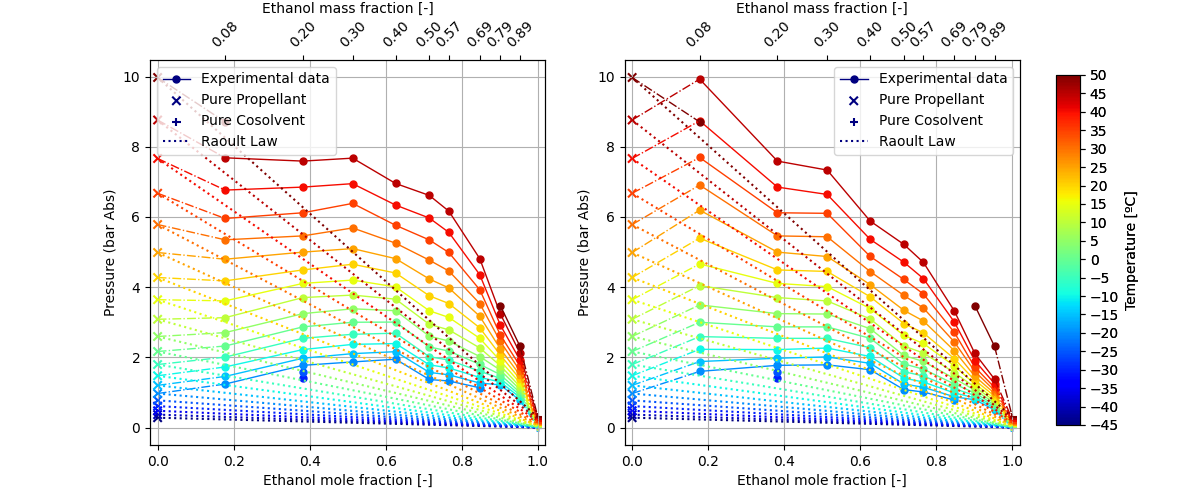

In [29]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
plt.title("RAW PRESSURE DATA")
make_composite_pressure_plot(all_temp, ethx, ethww, dataTempInterp, pureprop_interp, pureEthanolVP,\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

l='Raoult Law'
for p1,t in zip(pureprop_interp,all_temp):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls=':',c=cfun(normt(t)),label=l)
    if l is not None: l=None
ax.legend(loc=2);
#ax.plot(ethx,mTot,marker='s',c='k',label='Canister net weight [g]')
#ax.set_ylim(0,20)

ax=fig.add_subplot(122)
plt.title("CORRECTED PRESSURE DATA")

make_composite_pressure_plot(all_temp, ethx, ethww, normalizeMolarContent(dataTempInterp), pureprop_interp, pureEthanolVP,\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]');

l='Raoult Law'
for p1,t in zip(pureprop_interp,all_temp):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls=':',c=cfun(normt(t)),label=l)
    if l is not None: l=None
ax.legend();

In [30]:
# Scalar constants
R = 8.31446261815324 # J/mol-K
Omega_A = 0.45724
Omega_B = 0.07780
a = Omega_A*(R**2)*(Tc_p**2)/pc_p
b = Omega_B*R*Tc_p/pc_p
kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson
mwt=mwt_propellant*(1-ethx) + mwt_ethanol*(ethx) # g/mol
normalisedPressure=normalizeMolarContent(dataTempInterp)

PRZ={}; Vm={}
for t in dataTempInterp.keys():  # Loop through temperatures
    pressure = normalisedPressure[t]*1e5 # bar abs. to Pa
    TK = float(t)+273.15 # ºC to Kelvin
    Tr = TK/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    A = alpha*a*pressure/(R**2 * TK**2)  # PR coeff
    B = b*pressure/(R*TK)                # PR coeff

    # Cubic polynomial for Z is : Z^3 - (1-B)Z^2 + (A-2B-3B^2)Z - (AB-B^2-B^3) = 0
    coeffs = np.nan_to_num( np.vstack((np.ones_like(A), -(1-B), A-(2*B)-((3*B)**2), -(A*B - (B**2) - (B**3)))) )
    
    Z = np.array([ np.roots(coeffs[:,i]) for i in range(len(A)) ]) # solve
    Z[Z==0]=np.nan # mask
    PRZ[t] = Z# save

    # P.Vm = ZRT; Vm=ZRT/P
    Vm[t]=np.ones_like(Z)
    for i in range(3): Vm[t][:,i]*=(R*TK/pressure)*Z[:,i] #m^3/mol

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1002731877.py:33: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


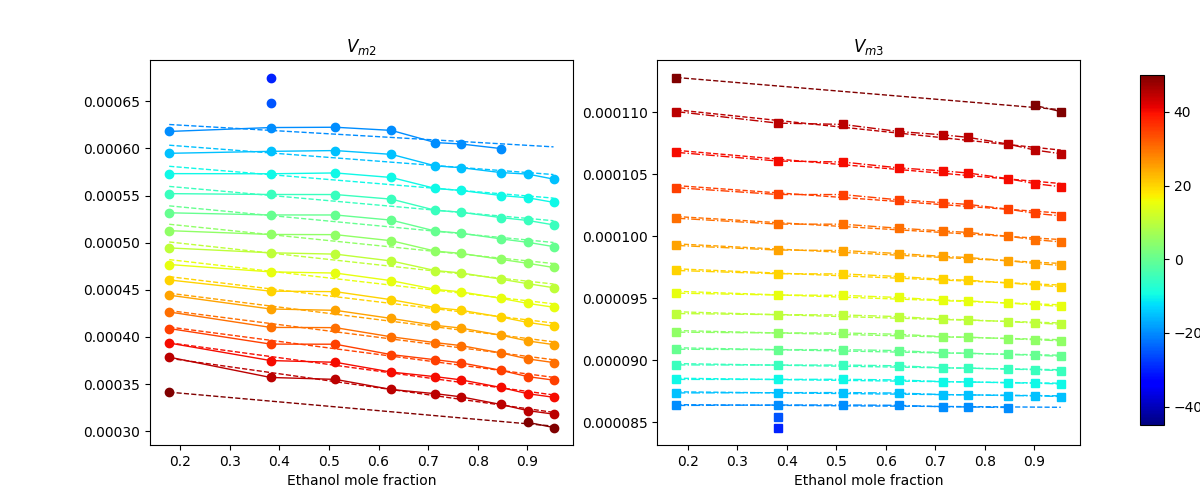

In [31]:
ffit  = lambda x,a,b : a*x+b

def r2_nonlin(original_data, fitted):
    ss_err = np.sum((original_data-fitted)**2)
    ss_tot = np.sum(original_data**2)
    return 1-np.sqrt(ss_err/ss_tot)

def do_fit(x, molarVolume, fun=ffit, p0=(1,0)):
    flt = ~np.isnan(molarVolume)
    if np.sum(flt)<2: return (np.nan, np.nan), 0
    popt, pcov = scipy.optimize.curve_fit(fun, np.array(x)[flt],\
                                          np.array(molarVolume)[flt], p0=p0)
    return popt, r2_nonlin(np.array(molarVolume), fun(np.array(x), *popt))
    
fig=plt.figure(figsize=(12,5))

ax2=fig.add_subplot(121)
plt.xlabel('Ethanol mole fraction')
plt.title(r'$V_{m2}$')

ax3=fig.add_subplot(122)
plt.xlabel('Ethanol mole fraction')
plt.title(r'$V_{m3}$')

fit_params = []

for t in dataTempInterp.keys():
    c = cfun(normt(float(t)))
    
    ax2.plot( ethx, Vm[t][:,1], c=c , marker='o', lw=1, ls='-')
    ax3.plot( ethx, Vm[t][:,2], c=c , marker='s', lw=1, ls='-.')

    popt1, r2 = do_fit(ethx, Vm[t][:,0])
    #ax.plot( ethx, ffit(ethx, *popt1), ls='--', c=c, lw=1)
    
    popt2, r2 = do_fit(ethx, Vm[t][:,1])
    ax2.plot( ethx, ffit(ethx, *popt2), ls='--', c=c, lw=1)

    popt3, r2 = do_fit(ethx, Vm[t][:,2])
    ax3.plot( ethx, ffit(ethx, *popt3), ls='--', c=c, lw=1)
    
    fit_params.append((popt1,popt2,popt3))
    
#plt.subplots_adjust(right=.94)
fit_params = np.array(fit_params)

# Colorbar
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, cmap='jet',norm=mpl.colors.Normalize(all_temp.min(),all_temp.max()))#,ticks=ethx)
cb.set_label('Temperature');

(20, 3, 2)
(2, 2, 4)


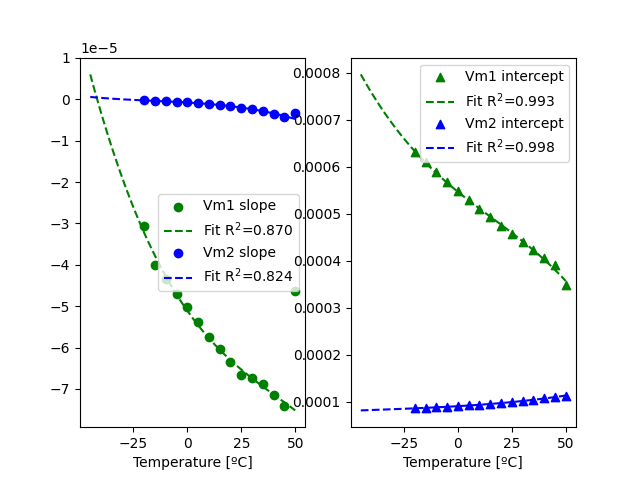

In [32]:
ffit2  = lambda x,a,b,c,d : d*x**3 + a*x**2+ b*x +c

fig=plt.figure()
cList=('r','g','b','c','m','y','k')
ax1=fig.add_subplot(121)
plt.xlabel('Temperature [ºC]')
ax2=fig.add_subplot(122)
plt.xlabel('Temperature [ºC]')
t_C = np.linspace(all_temp.min(), all_temp.max(), 50)

fit_params2=[]
print(fit_params.shape)

for i in (1,2):
    # get non-NaN entries
    flt = ~np.isnan(fit_params[:,i,0])

    # Fit and plot slope
    ax1.scatter(all_temp,fit_params[:,i,0],marker='o',c=cList[i],label='Vm%i slope' % i)
    popt_slope,pcov = scipy.optimize.curve_fit(ffit2, all_temp[flt][:-2],fit_params[flt,i,0][:-2]) # ignore outlier at T=50ºC
    
    r2 = r2_nonlin(fit_params[flt,i,0], ffit2(all_temp[flt],*popt_slope))
    ax1.plot(t_C, ffit2(t_C,*popt_slope), ls='--', c=cList[i],label=r'Fit R$^2$=%.3f' % r2)

    # Fit and plot intercept
    ax2.scatter(all_temp,fit_params[:,i,1],marker='^',c=cList[i],label='Vm%i intercept' % i);
    popt_inter,pcov = scipy.optimize.curve_fit(ffit2, all_temp[flt],fit_params[flt,i,1])
    
    r2 = r2_nonlin(fit_params[flt,i,1], ffit2(all_temp[flt],*popt_inter))
    ax2.plot(t_C, ffit2(t_C,*popt_inter), ls='--', c=cList[i],label=r'Fit R$^2$=%.3f' % r2)

    fit_params2.append((popt_slope,popt_inter))
    
ax1.legend();
ax2.legend();
fit_params2=np.array(fit_params2);
print(fit_params2.shape)

In [33]:
# Peng-Robinson EoS

PR_coeffs = fit_params2[0,...]

x_ = np.linspace(0,1,50)

def pr_fit(t_):

    # Matrix of temp(ºC) and mole fraction
    tt, xx = np.meshgrid(t_,x_)
    
    # Calculate matrix of Vm
    m = PR_coeffs[0,0]*t_**2 + PR_coeffs[0,1]*t_ + PR_coeffs[0,2] + PR_coeffs[0,3]*t_**3
    n = PR_coeffs[1,0]*t_**2 + PR_coeffs[1,1]*t_ + PR_coeffs[1,2] + PR_coeffs[1,3]*t_**3
    Vm_ = m*xx + n
    
    # Peng-Robinson EoS
    R = 8.31446261815324 # J/mol-K
    Omega_A = 0.45724
    Omega_B = 0.07780
    a = Omega_A*(R**2)*(Tc_p**2)/pc_p
    b = Omega_B*R*Tc_p/pc_p
    kappa = 0.37464+1.54226*omega_p-0.26992*omega_p**2 # Peng-Robinson
    TK_ = tt+273.15 # ºC to Kelvin
    Tr = TK_/Tc_p # Reduced temperature
    alpha = (1+kappa*(1-np.sqrt(Tr)))**2 # PR coeff
    
    p0 = (R*TK_)/(Vm_ - b)
    p1 = a*alpha/(Vm_**2 + 2*b*Vm_ - b**2)
    p_ = (p0-p1)/1e5

    return p_

/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_37623/1002731877.py:33: RuntimeWarning: Mean of empty slice
  norm = np.nanmean(totalMoles[1]) / totalMoles


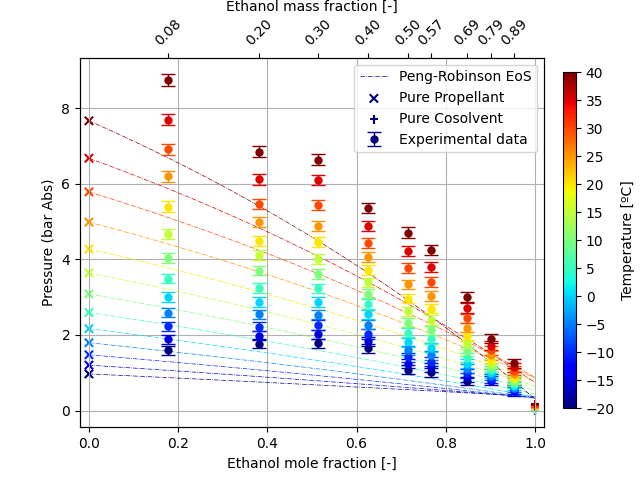

In [34]:
# Make production ready figure.

fig=plt.figure()
ax=fig.add_subplot(111)

n=5 # starting temperature index.
m=-2 # ending temperature index

pressureData = normalizeMolarContent(dataTempInterp)
def normt(t_): return (t_-all_temp[n:m].min())/(all_temp[n:m].max()-all_temp[n:m].min())
pressureDataLimited = { str(t): pressureData[str(t)] for t in all_temp[n:m].astype(int) }

eps = { t: pressureDataLimited[t]*0.50/100. + 13.78*0.008 for t in pressureDataLimited.keys() }

lab='Peng-Robinson EoS'
for i in range(len(all_temp[n:m])):
    pr_p = pr_fit(all_temp[n:m])
    sc = pureprop_interp[n+i]/pr_p[0,i]
    plt.plot(x_,sc*pr_p[:,i],c=cfun(normt(all_temp[n+i])),lw=.5,ls='-.',label=lab);
    lab=None


make_composite_pressure_plot(all_temp[n:m], ethx, ethww, pressureDataLimited, pureprop_interp[n:m], pureEthanolVP[n:m],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None', dataError=eps);

plt.savefig("R1234zeE_PR.pdf");
keepData['1234ze']=(all_temp[n:], ethx, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:], eps, ethww)

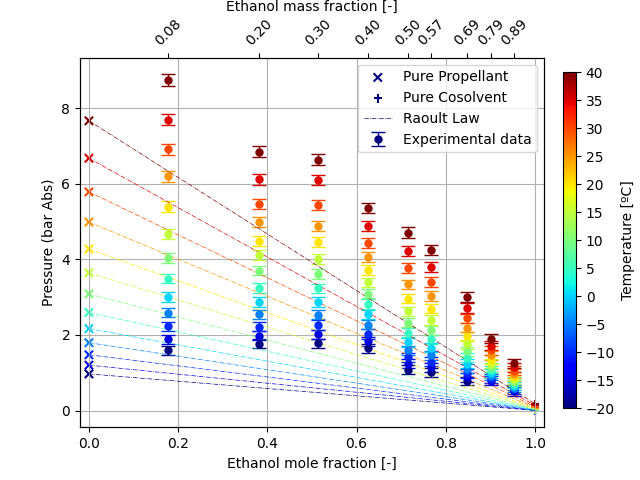

In [35]:
# For comparison, show the Raoult Law line

fig=plt.figure()
ax=fig.add_subplot(111)

make_composite_pressure_plot(all_temp[n:m], ethx, ethww, pressureDataLimited, pureprop_interp[n:m], pureEthanolVP[n:m],\
                             'Ethanol mole fraction [-]', 'Ethanol mass fraction [-]', ls='None',dataError=eps);

l='Raoult Law'
for p1,t in zip(pureprop_interp[n:m],all_temp[n:m]):
    p2 = ethanol_antoine(np.array((t,)))[0]
    ax.plot((0,1),(p1,p2),ls='-.',c=cfun(normt(t)),label=l,lw=.5)
    if l is not None: l=None
ax.legend();
plt.savefig("R1234zeE_RL.pdf");

## Plot a comparison of all propellants along an isotherm

Also write data to CSV file for later use.

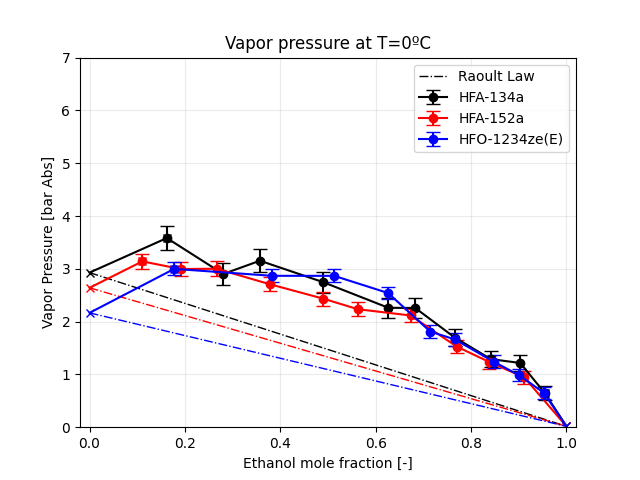

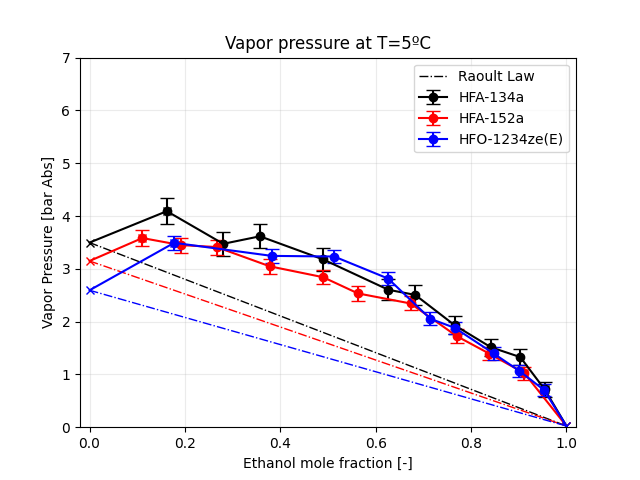

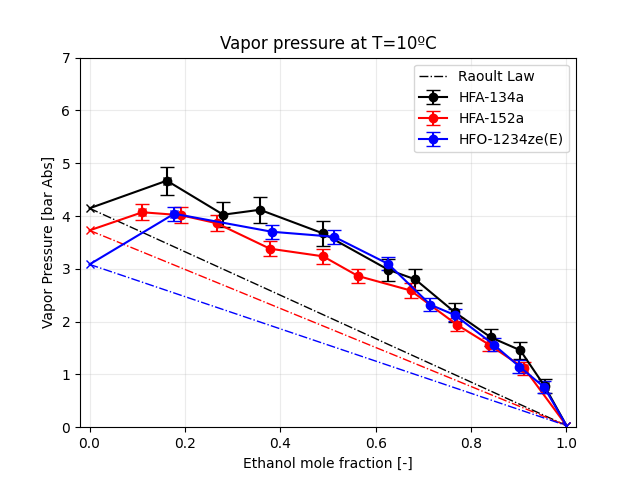

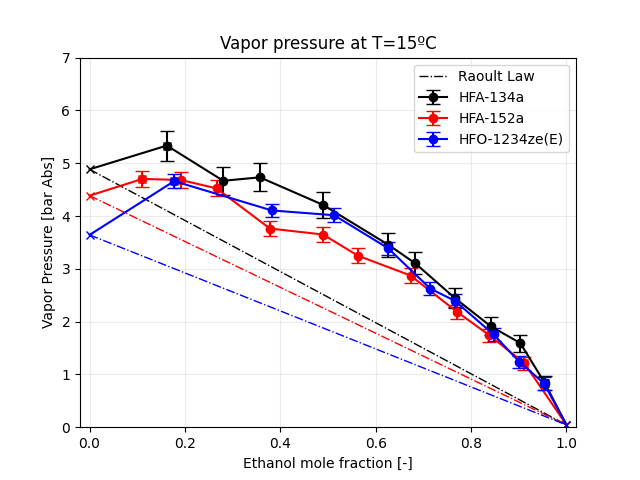

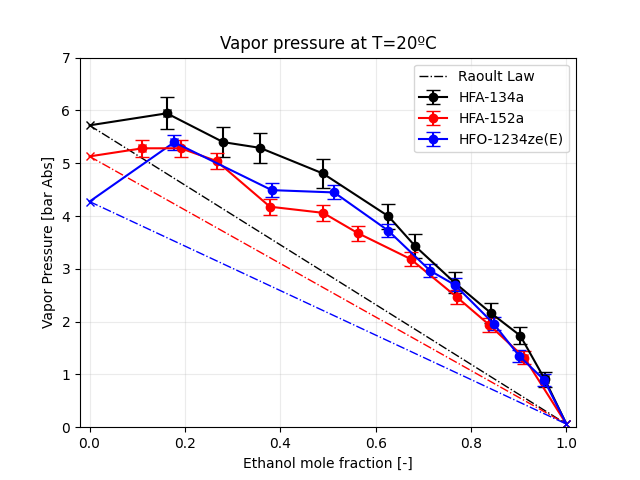

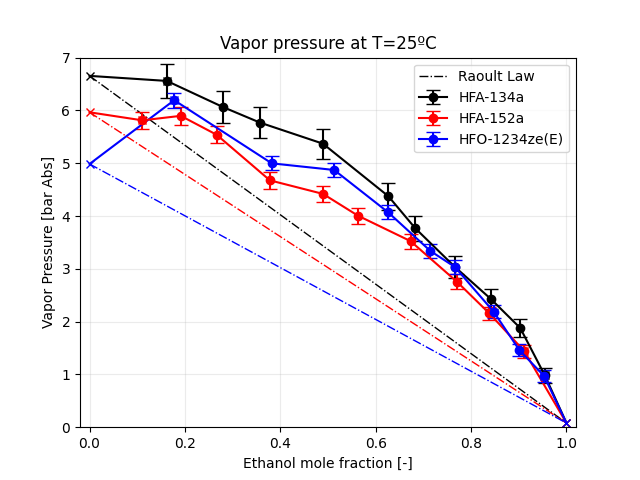

In [53]:
def plot_isotherm(ts='20'):
    # data stored in:
    #keepData[n] = (all_temp[n:], ethx, pressureDataLimited, pureprop_interp[n:], pureEthanolVP[n:], uncrt, ethww)}

    fig=plt.figure()
    ci=1 # size of confidence interval in std devs
    cList={'134a':'k', '152a':'r', '1234ze':'b'}
    lList={'134a':'HFA-134a', '152a':'HFA-152a', '1234ze':'HFO-1234ze(E)'}
    lr='Raoult Law'
    with open('isotherm_output_%sC.csv' % ts, 'w') as F:
        for prop in keepData.keys():
            # GET DATA, FIND TEMP 
            t, x, p, pp, pe, eps, y = keepData[prop]
            ti = np.where(t==float(ts))[0][0]

            # MAKE PLOT
            plt.errorbar(x,p[ts],yerr=ci*eps[ts],marker='o', label=lList[prop],c=cList[prop],capsize=5)
            plt.plot((0,x[0]),(pp[ti],p[ts][0]),c=cList[prop],marker='x')
            plt.plot((x[-1],1),(p[ts][-1],pe[ti]),c=cList[prop],marker='x')
            plt.plot((0,1),(pp[ti],pe[ti]),c=cList[prop],lw=1,ls='-.',label=lr)
            lr=None

            # WRITE CSV
            F.write('##### %s - ethanol blend at %s ºC ######,,,\n' % (prop,ts))
            F.write('# Ethanol mole fraction, Ethanol mass fraction, SVP [bar abs], SVP error [bar]\n')
            F.write('0,0,%g,%g\n' % (pp[ti],pp[ti]*0.001))
            for i in range(len(x)):
                F.write('%g,%g,%g,%g\n' % (x[i],y[i],p[ts][i],ci*eps[ts][i]))
            F.write('1,1,%g,%g\n' % (pe[ti],pe[ti]*.001))
            F.write('\n')
    
    plt.legend();
    plt.ylabel("Vapor Pressure [bar Abs]")
    plt.xlabel("Ethanol mole fraction [-]")
    plt.grid(alpha=.25)
    plt.xlim(-0.02,1.02);
    plt.ylim(0,7);
    plt.title(r"Vapor pressure at T=%sºC" % ts);
    
    plt.savefig("Pvap_Comparison_%sC.pdf" % ts)
    plt.show();

plot_isotherm('0')
plot_isotherm('5')
plot_isotherm('10')
plot_isotherm('15')
plot_isotherm('20')
plot_isotherm('25')